# Libraries and versions

In [1]:
python_version = !python -V #version 3.7.9
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.3
from random import randint

#Modelo
from sklearn.metrics import mean_squared_log_error, r2_score


In [2]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')

Python version - 3.7.9
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.0
Matplotlib version - 3.3.3


# Configurations

## Pandas

In [3]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)

## Seaborn

In [4]:
sns.set_palette('inferno')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors='black'):
    graphic_object.figure.set_size_inches(15,4)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Base

In [6]:
bvsp = pd.read_csv('bvsp_modelado_original.csv')
bvsp.head()

,data,abertura,alta,baixa,fechamento,var_abertura,media_movel_180,media_movel_240,media_movel_360,media_movel_480
0,1995-02-27,3217.399902,3345.800049,3184.399902,3270.899902,0.000000,4404.944448,3785.654587,2719.633892,2057.587711
1,1995-02-28,3217.399902,3345.800049,3184.399902,3270.899902,0.000000,4404.830560,3792.938337,2728.090837,2064.238961
2,1995-03-01,3217.399902,3345.800049,3184.399902,3270.899902,0.000000,4404.943892,3800.340836,2736.526114,2070.890836
3,1995-03-02,3270.899902,3270.899902,2970.199951,2989.100098,53.500000,4405.345558,3807.966252,2745.099169,2077.654585
4,1995-03-03,2989.100098,3018.100098,2841.699951,2988.000000,-281.799804,4404.507225,3814.417502,2752.882781,2083.832502


### Informações

In [7]:
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             6637 non-null   object 
 1   abertura         6637 non-null   float64
 2   alta             6637 non-null   float64
 3   baixa            6637 non-null   float64
 4   fechamento       6637 non-null   float64
 5   var_abertura     6637 non-null   float64
 6   media_movel_180  6637 non-null   float64
 7   media_movel_240  6637 non-null   float64
 8   media_movel_360  6637 non-null   float64
 9   media_movel_480  6637 non-null   float64
dtypes: float64(9), object(1)
memory usage: 518.6+ KB


### Transformar dados

In [8]:
#transforma variável data em datetime
bvsp['data'] = pd.to_datetime(bvsp['data'])
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             6637 non-null   datetime64[ns]
 1   abertura         6637 non-null   float64       
 2   alta             6637 non-null   float64       
 3   baixa            6637 non-null   float64       
 4   fechamento       6637 non-null   float64       
 5   var_abertura     6637 non-null   float64       
 6   media_movel_180  6637 non-null   float64       
 7   media_movel_240  6637 non-null   float64       
 8   media_movel_360  6637 non-null   float64       
 9   media_movel_480  6637 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 518.6 KB


In [9]:
#excluí colunas de lag, diff e estatística móvel
bvsp.drop(columns=['var_abertura', 'media_movel_180', 'media_movel_240', 'media_movel_360', 'media_movel_480'], inplace=True)
bvsp.columns

Index(['data', 'abertura', 'alta', 'baixa', 'fechamento'], dtype='object')

## Baseline

Criarei dois baselines para cada valor, considerando a média móves de 5 e 10 dias

Utilizarei os dados do segundo semestre de 2020 até o fim do dataset

In [16]:
#Alta média móvel de 5 e 10 dias
bvsp['alta_m5'] = bvsp['alta'].rolling(5).mean()
bvsp['alta_m10'] = bvsp['alta'].rolling(10).mean()

#Baixa média móvel de 5 e 10 dias
bvsp['baixa_m5'] = bvsp['baixa'].rolling(5).mean()
bvsp['baixa_m10'] = bvsp['baixa'].rolling(10).mean()

#Fechamento média móvel de 5 e 10 dias
bvsp['fechamento_m5'] = bvsp['fechamento'].rolling(5).mean()
bvsp['fechamento_m10'] = bvsp['fechamento'].rolling(10).mean()

base_validacao = bvsp.query('data>="2020-06-01"')
base_validacao

,data,abertura,alta,baixa,fechamento,alta_m5,alta_m10,baixa_m5,baixa_m10,fechamento_m5,fechamento_m10
6401,2020-06-01,87395.0,89019.0,86837.0,88620.0,87959.8,85647.6,85970.4,83641.8,87277.4,84931.1
6402,2020-06-02,88622.0,91046.0,88622.0,91046.0,88702.4,86534.7,86615.6,84439.3,88392.8,85961.5
6403,2020-06-03,91048.0,93710.0,91048.0,93002.0,89855.2,87676.7,87731.6,85470.1,89404.0,87129.8
6404,2020-06-04,92993.0,94132.0,92221.0,93829.0,91063.4,88759.0,88822.4,86560.5,90780.0,88210.0
6405,2020-06-05,93839.0,97356.0,93839.0,94637.0,93052.6,90191.9,90513.4,87777.5,92226.8,89456.4
...,...,...,...,...,...,...,...,...,...,...,...
6632,2021-05-10,122038.0,122772.0,121795.0,121909.0,120760.6,120761.8,119228.8,119166.4,120228.8,119975.4
6633,2021-05-11,121904.0,122964.0,120145.0,122964.0,121494.8,120957.0,119731.6,119280.6,121279.2,120333.0
6634,2021-05-12,122964.0,122964.0,119458.0,119710.0,122140.8,121125.8,120078.2,119287.2,121308.4,120198.7
6635,2021-05-13,119711.0,121426.0,119711.0,120706.0,122432.8,121118.6,120206.2,119288.0,121465.4,120262.7


## Gráficos baseline

#### Fechamento

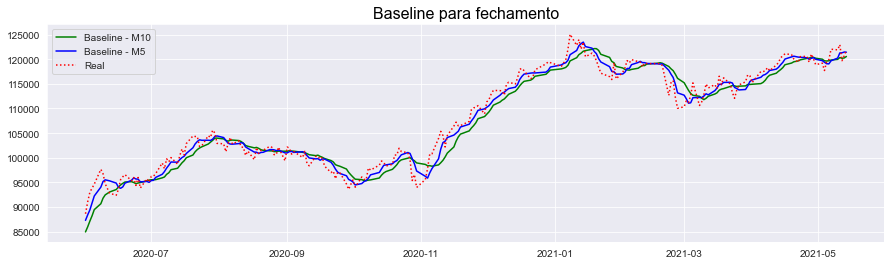

In [30]:
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['fechamento_m10'], color='green', label='Baseline - M10')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['fechamento_m5'], color='blue', label='Baseline - M5')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['fechamento'], color='red', linestyle='dotted', label='Real')
configuration(g4, title='Baseline para fechamento')

#### Baixa

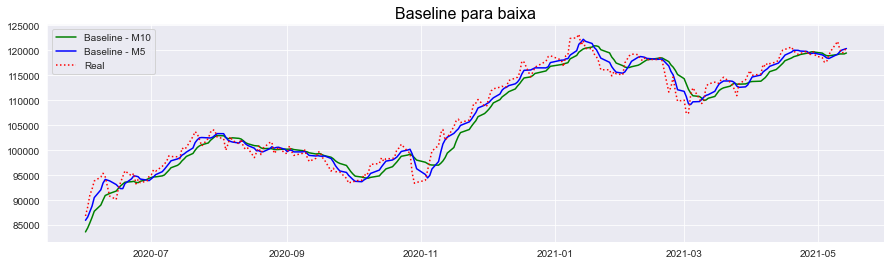

In [31]:
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['baixa_m10'], color='green', label='Baseline - M10')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['baixa_m5'], color='blue', label='Baseline - M5')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['baixa'], color='red', linestyle='dotted', label='Real')
configuration(g4, title='Baseline para baixa')

#### Alta

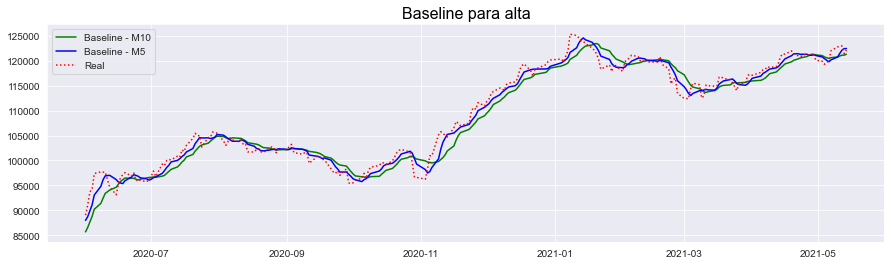

In [32]:
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['alta_m10'], color='green', label='Baseline - M10')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['alta_m5'], color='blue', label='Baseline - M5')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['alta'], color='red', linestyle='dotted', label='Real')
configuration(g4, title='Baseline para alta')

## Scores

In [34]:
def scores(y_real, y_previsto_m5, y_previsto_m10, nome):
    print(f'R2 Score para {nome} Média móvel 5')
    print(r2_score(y_real, y_previsto_m5))
    print('')
    print(f'Erro Médio Quadrático para {nome} Média móvel 5')
    print(mean_squared_log_error(y_real, y_previsto_m5))
    print('')
    print(f'R2 Score para {nome} Média móvel 10')
    print(r2_score(y_real, y_previsto_m10))
    print('')
    print(f'Erro Médio Quadrático para {nome} Média móvel 10')
    print(mean_squared_log_error(y_real, y_previsto_m10))

### Fechamento

In [36]:
scores(y_real=base_validacao['fechamento'], y_previsto_m5=base_validacao['fechamento_m5'],
       y_previsto_m10=base_validacao['fechamento_m10'], nome='FECHAMENTO')

R2 Score para FECHAMENTO Média móvel 5
0.9752927508624465

Erro Médio Quadrático para FECHAMENTO Média móvel 5
0.0002070568135448706

R2 Score para FECHAMENTO Média móvel 10
0.9421488271917396

Erro Médio Quadrático para FECHAMENTO Média móvel 10
0.0004907330411395949


### Baixa

In [37]:
scores(y_real=base_validacao['baixa'], y_previsto_m5=base_validacao['baixa_m5'],
       y_previsto_m10=base_validacao['baixa_m10'], nome='BAIXA')

R2 Score para BAIXA Média móvel 5
0.9758402555749194

Erro Médio Quadrático para BAIXA Média móvel 5
0.00020917228104033755

R2 Score para BAIXA Média móvel 10
0.9407953640150044

Erro Médio Quadrático para BAIXA Média móvel 10
0.0005155140199771088


### Alta

In [38]:
scores(y_real=base_validacao['alta'], y_previsto_m5=base_validacao['alta_m5'],
       y_previsto_m10=base_validacao['alta_m10'], nome='ALTA')

R2 Score para ALTA Média móvel 5
0.9804669174835944

Erro Médio Quadrático para ALTA Média móvel 5
0.00016272707570038692

R2 Score para ALTA Média móvel 10
0.9493197655806777

Erro Médio Quadrático para ALTA Média móvel 10
0.00042601269607290925


## Conclusão

O melhor baseline considera a média móvel de 5 dias para as previsões, portanto serão esses os valores considerados